<a href="https://colab.research.google.com/github/SudeepManjhi/Stock_price-prediction/blob/main/Stock_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of days
n_days = 500

# Generate base price trend
base_price = 100 + np.cumsum(np.random.normal(0, 1, n_days))  # simulate price changes

# Generate OHLC prices
open_price = base_price + np.random.normal(0, 1, n_days)
high_price = open_price + np.abs(np.random.normal(0, 2, n_days))
low_price = open_price - np.abs(np.random.normal(0, 2, n_days))
close_price = low_price + (high_price - low_price) * np.random.rand(n_days)

# Generate volume
volume = np.random.randint(1_000_000, 5_000_000, n_days)

# Generate technical indicators (simple 7-day moving average)
moving_avg_7 = pd.Series(close_price).rolling(window=7).mean().fillna(method='bfill')

# Simulate market sentiment score (-1 to +1)
sentiment = np.random.uniform(-1, 1, n_days)

# Create DataFrame
df_stock = pd.DataFrame({
    'Open': open_price.round(2),
    'High': high_price.round(2),
    'Low': low_price.round(2),
    'Close': close_price.round(2),
    'Volume': volume,
    'MA_7': moving_avg_7.round(2),
    'SentimentScore': sentiment.round(2)
})

# Save to CSV
df_stock.to_csv("stock_data.csv", index=False)

print("Stock market data created and saved to 'stock_data.csv'")
print(df_stock.head())


Stock market data created and saved to 'stock_data.csv'
     Open    High     Low   Close   Volume    MA_7  SentimentScore
0  101.42  104.22   99.87  101.64  1650443  101.67           -0.56
1  102.27  104.12  101.17  101.36  4436102  101.67            0.32
2   99.61   99.73   97.97   98.58  3595834  101.67           -0.03
3  103.09  104.39  103.09  103.23  1059778  101.67           -0.99
4  101.64  103.04  101.30  102.71  2094409  101.67            0.61


<ipython-input-1-168ace043dab>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  moving_avg_7 = pd.Series(close_price).rolling(window=7).mean().fillna(method='bfill')


✅ Linear Regression Results:
Mean Squared Error (MSE): 1.05
R-squared (R²): 0.9795


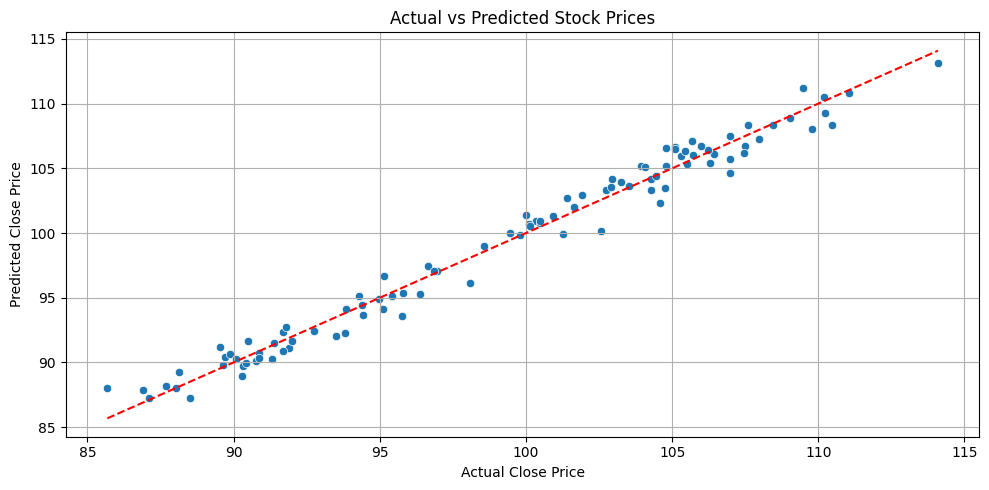

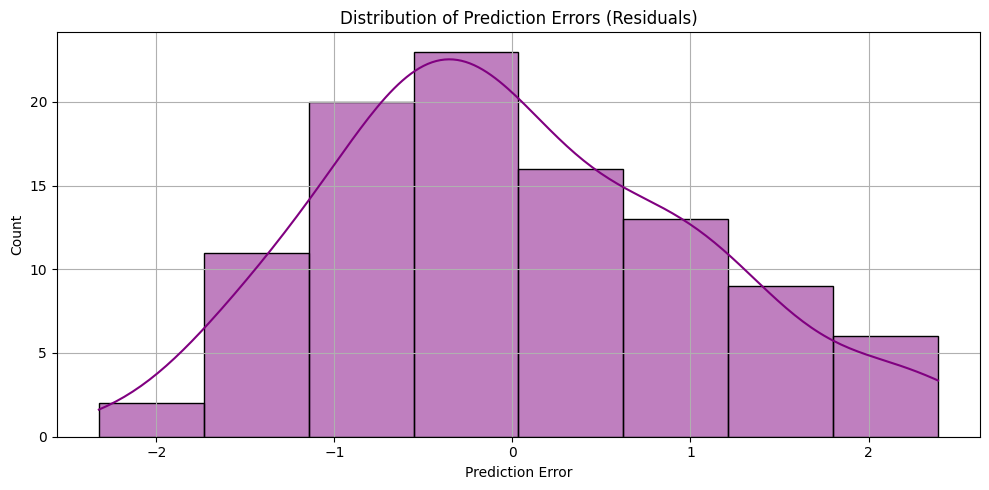

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('stock_data.csv')

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'SentimentScore']
target = 'Close'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot 1: Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Stock Prices")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()

# Plot 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
error_margin = 2.0
within_margin = abs(y_test - y_pred) <= error_margin
custom_accuracy = within_margin.sum() / len(within_margin) * 100

print(f"Custom Accuracy (within ±{error_margin} units): {custom_accuracy:.2f}%")


Custom Accuracy (within ±2.0 units): 94.00%
